In [76]:
pip install pandas
pip install openpyxl
pip install seaborn
pip install matplotlib
pip install plotly
pip install squarify

SyntaxError: invalid syntax (1227504146.py, line 1)

In [128]:
pip install lifetimes

     ---------------------------------------- 0.0/584.2 kB ? eta -:--:--
     -------------- ----------------------- 225.3/584.2 kB 6.9 MB/s eta 0:00:01
     -------------------------------------  583.7/584.2 kB 6.2 MB/s eta 0:00:01
     -------------------------------------- 584.2/584.2 kB 6.2 MB/s eta 0:00:00
  Obtaining dependency information for autograd>=1.2.0 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   ---------------------------------------- 49.3/49.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import plotly.graph_objs as go
from plotly.offline import iplot
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'Set2'

In [38]:
import pandas as pd

# Define the path to the XLSX file
xlsx_file_path = "data/online_retail_II.xlsx"

# Define the path for the CSV file
csv_file_path = "data/online_retail_II.csv"

file_path = "data/online_retail_II.xlsx"
# Read the XLSX file into a Pandas DataFrame
df = pd.read_excel(xlsx_file_path)

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

df.sample(2)

Invoice StockCode                        Description  Quantity  \
312548  519821     22588          CARD HOLDER GINGHAM HEART         6   
51174   494019     20796  SMALL BLUE PROVENCAL CERAMIC BALL         1   

               InvoiceDate  Price  Customer ID         Country  
312548 2010-08-20 14:13:00   2.55      15248.0  United Kingdom  
51174  2010-01-11 09:38:00   3.43          NaN  United Kingdom

## Exploratory Data Analysis

In [39]:
df.describe()

Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

In [40]:
# Data types of columns
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [41]:
# Select numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
numeric_columns.corr()

Quantity     Price  Customer ID
Quantity     1.000000 -0.001931    -0.011577
Price       -0.001931  1.000000    -0.003266
Customer ID -0.011577 -0.003266     1.000000

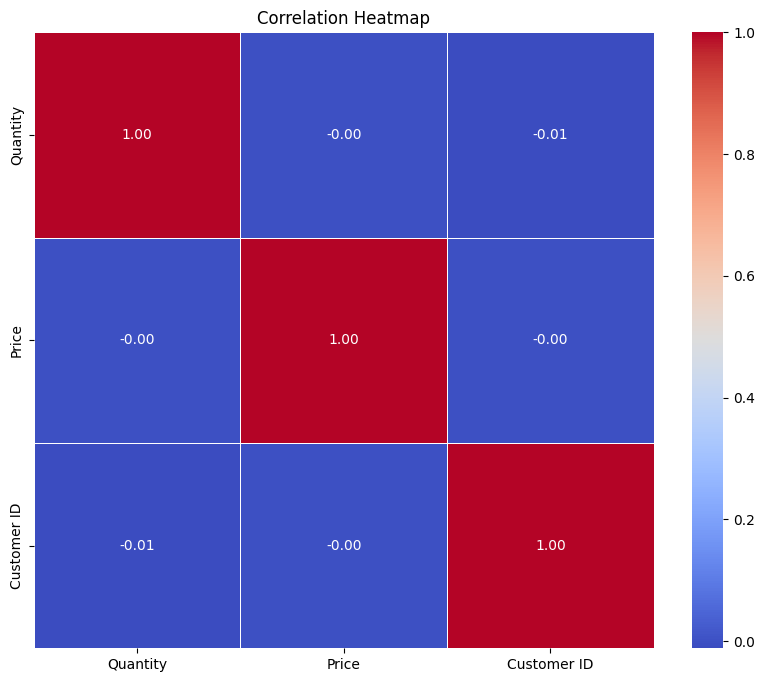

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've loaded the dataset into a DataFrame named 'df'

# Select numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Define the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

## Data Quality Analysis

In [43]:
# Count the number of missing values in each column
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

### Imputation

In [44]:
df.dropna(subset=['Customer ID'], inplace=True)
df['Description'].fillna('', inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [75]:
# Distribution of values in categorical columns
df['Country'].value_counts().head()

Country
United Kingdom    379423
EIRE                8710
Germany             8129
France              5710
Netherlands         2769
Name: count, dtype: int64

In [46]:
# Distribution of values in non-numeric columns
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    3245
REGENCY CAKESTAND 3 TIER              1872
STRAWBERRY CERAMIC TRINKET BOX        1536
ASSORTED COLOUR BIRD ORNAMENT         1376
HOME BUILDING BLOCK WORD              1229
                                      ... 
BLUE OWL DECORATION                      1
PINK OWL DECORATION                      1
IVORY WALL CLOCK                         1
RED WALL CLOCK                           1
BAKING MOULD EASTER EGG MILK CHOC        1
Name: count, Length: 4459, dtype: int64

In [51]:
df.rename(columns={'Customer ID': 'Customer_ID'}, inplace=True)
df['Customer_ID'].value_counts()

Customer_ID
14911.0    5710
17841.0    5114
14606.0    3927
14156.0    2710
12748.0    2665
           ... 
18174.0       1
14827.0       1
17645.0       1
16443.0       1
13222.0       1
Name: count, Length: 4383, dtype: int64

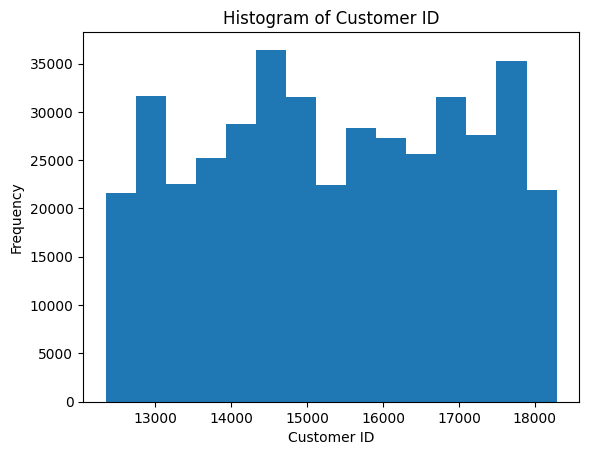

In [57]:
import matplotlib.pyplot as plt

# Create a histogram for the "Customer ID" column
plt.hist(df['Customer_ID'], bins=15)  # 'bins' specify the number of intervals

# Add labels and a title
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title('Histogram of Customer ID')

# Display the plot
plt.show()

## Preprocessing and Data Preparation

In [58]:
# Date-Time Feature Engineering
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
# df.drop(columns=['InvoiceDate'], inplace=True)
df.head(2)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   

          InvoiceDate  Price  Customer_ID         Country  Year  Month  Day  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009     12    1   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     12    1   

   Hour  
0     7  
1     7

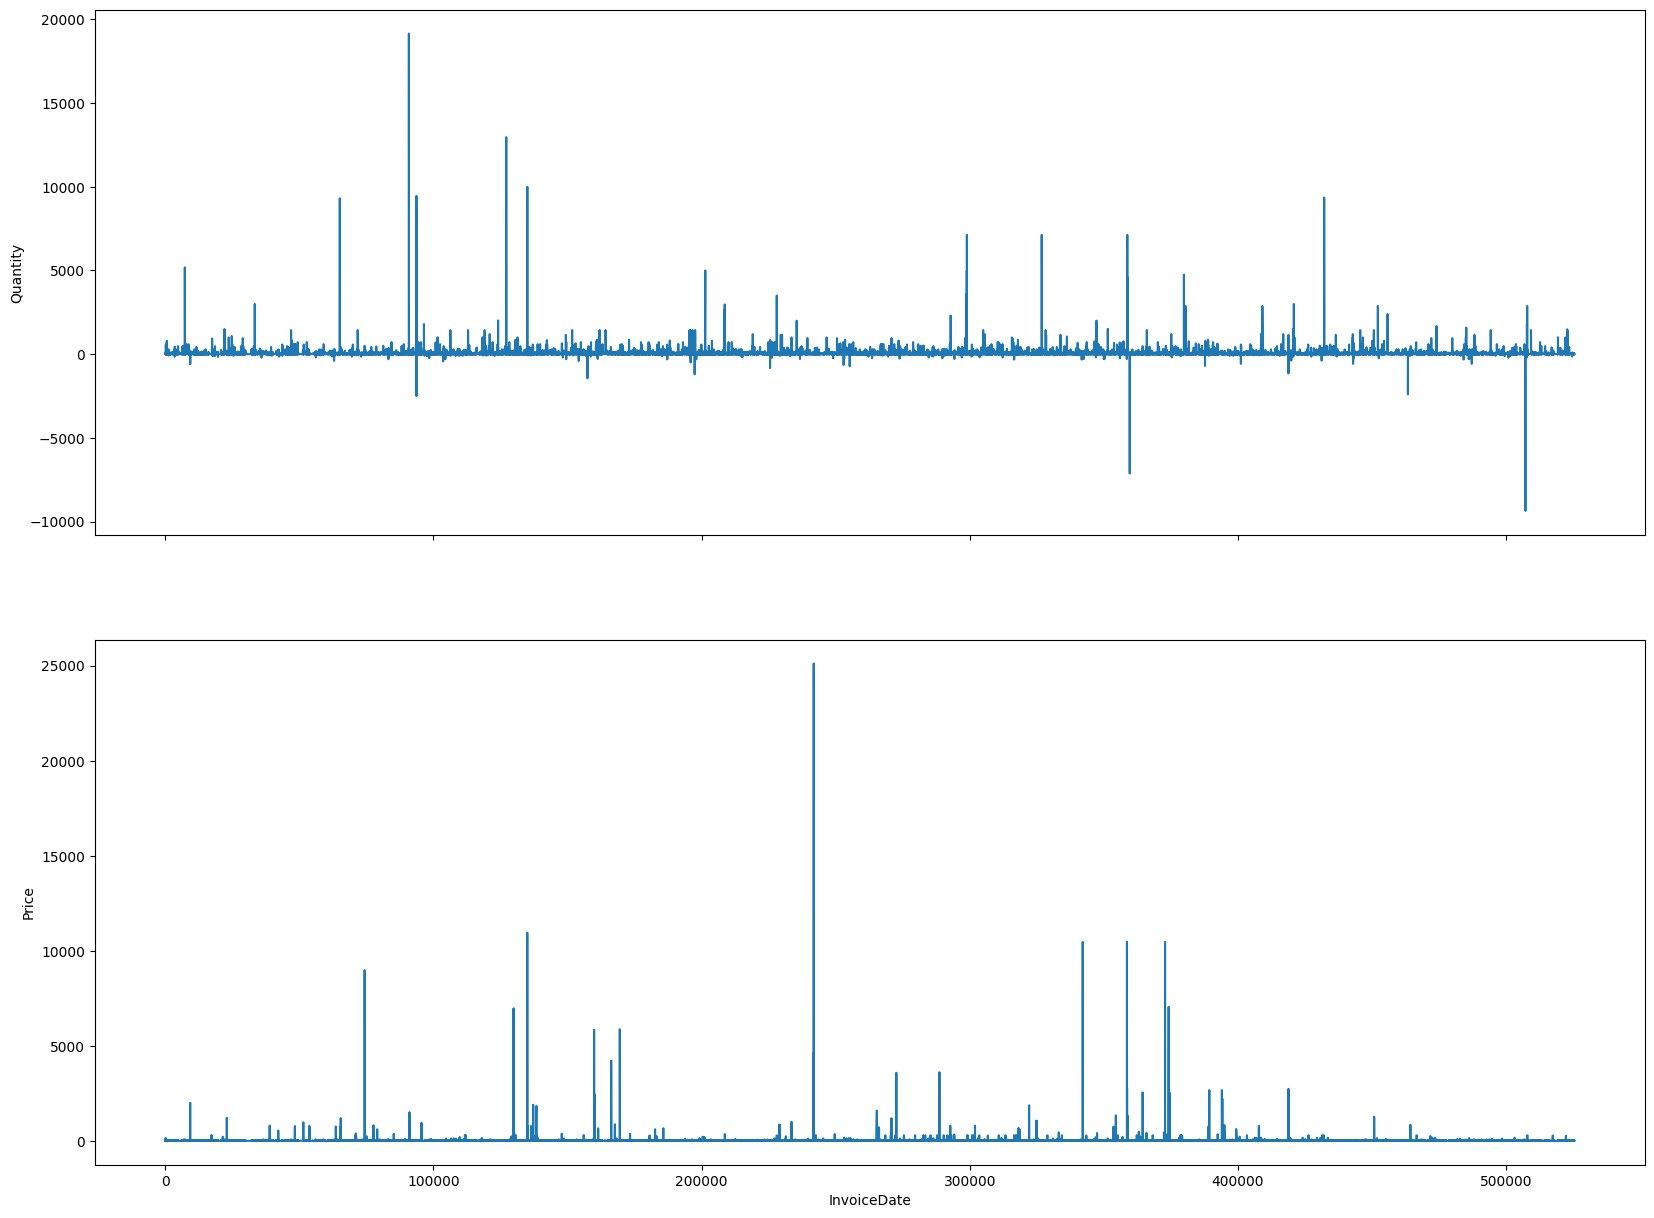

In [66]:
import matplotlib.pyplot as plt

# Plot subplots for different variables
variables = ['Quantity', 'Price']

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(20, 15), sharex=True)

for i, variable in enumerate(variables):
    df[variable].plot(ax=axes[i])
    axes[i].set_ylabel(variable)

# Set the common x-axis label
axes[-1].set_xlabel('InvoiceDate')

plt.show()

### Descriptive Statistics

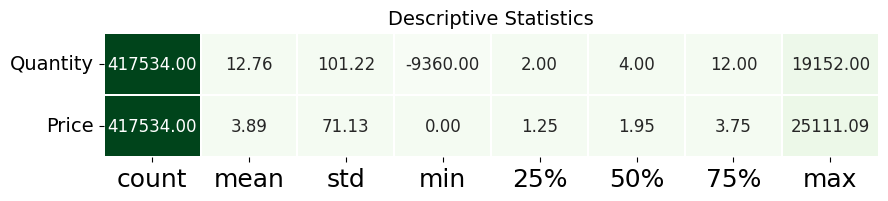

In [81]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "Greens",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df[['Quantity', 'Price']])

#### RFM Metrics

In [82]:
print(df['InvoiceDate'].max())

2010-12-09 20:01:00


In [94]:
import datetime as dt

today_date = dt.datetime(2023,10,24)

rfm = df.groupby('Customer_ID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'Quantity': lambda x: x.sum(),
                                    'Price': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm['monetary'] = rfm['monetary'].apply(lambda x: 0 if x <= 0 else x)
rfm = rfm.reset_index()

rfm.sort_values(by='monetary', ascending=False).head()

Customer_ID  recency  frequency  monetary
1869      14911.0     4701      66561  40282.40
1225      14063.0     4766       3846  39920.95
2478      15760.0     4966         -1  33628.55
378       12918.0     4962         -1  32860.50
1291      14156.0     4707     106885  29888.03

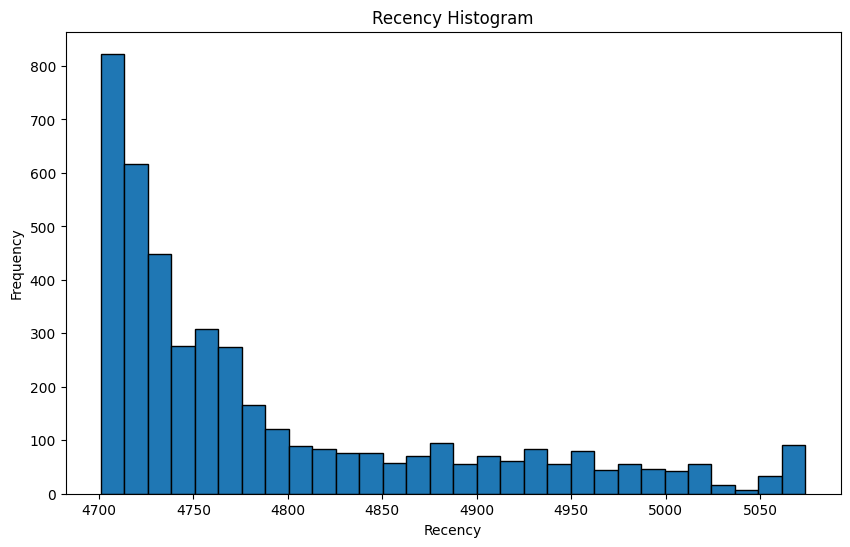

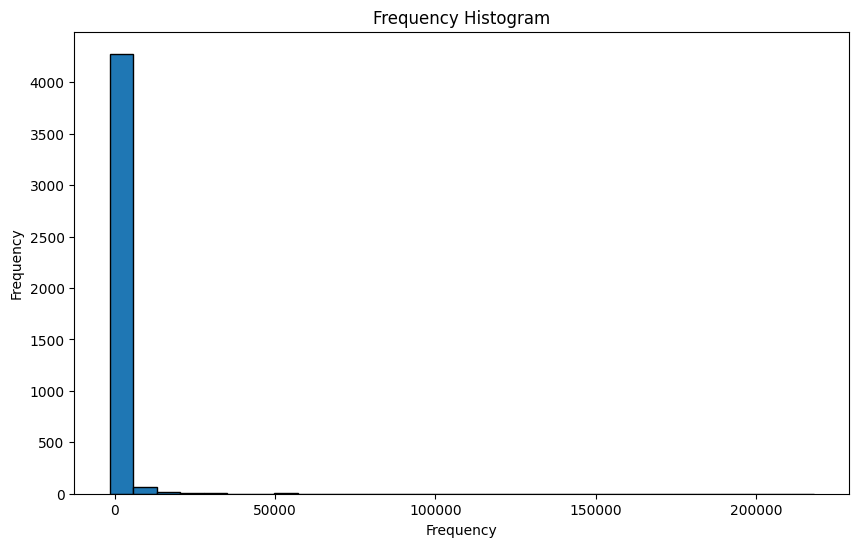

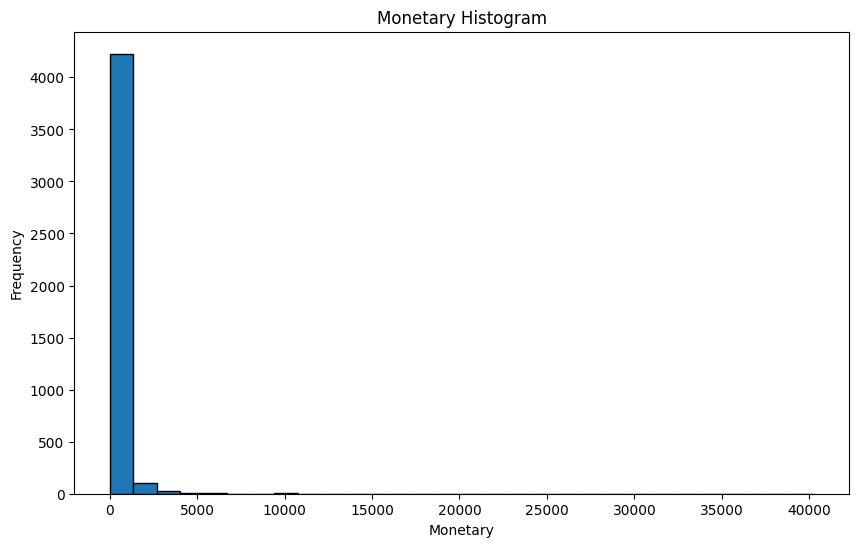

In [97]:
# Plot a histogram for recency
plt.figure(figsize=(10, 6))
plt.hist(rfm['recency'], bins=30, edgecolor='k')
plt.title('Recency Histogram')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for frequency
plt.figure(figsize=(10, 6))
plt.hist(rfm['frequency'], bins=30, edgecolor='k')
plt.title('Frequency Histogram')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for monetary
plt.figure(figsize=(10, 6))
plt.hist(rfm['monetary'], bins=30, edgecolor='k')
plt.title('Monetary Histogram')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

### Segmentation

In [102]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(
        str
    )

    return df_


rfm = get_rfm_scores(rfm)


seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

Customer_ID  recency  frequency  monetary recency_score frequency_score  \
0      12346.0     4767         52    578.36             3               1   
1      12347.0     4703        828    162.95             5               4   
2      12348.0     4774        373     14.39             2               3   
3      12349.0     4743        988    899.49             3               4   
4      12351.0     4711        261     49.46             5               2   

  monetary_score RFM_SCORE              segment  
0              5        31       about_to_sleep  
1              3        54            champions  
2              1        23              at_Risk  
3              5        34      loyal_customers  
4              2        52  potential_loyalists

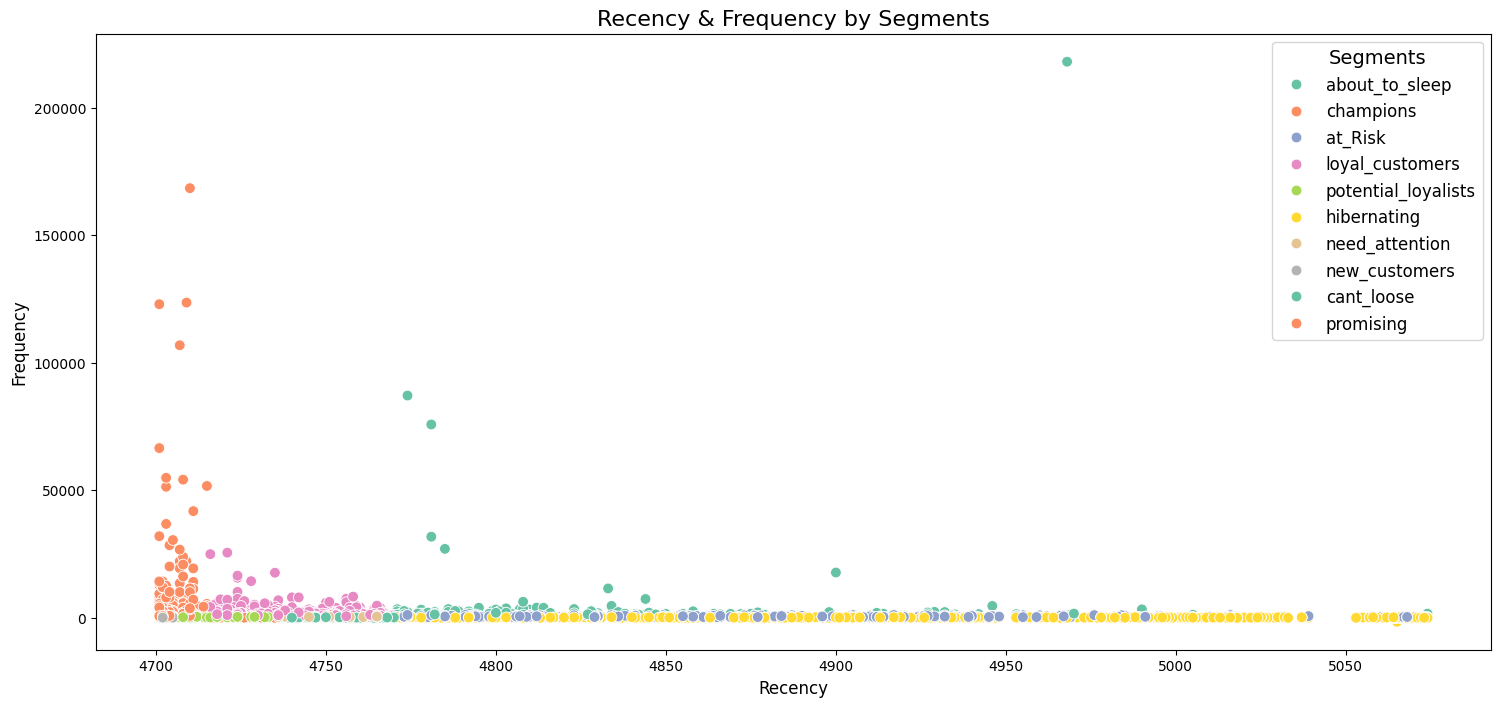

In [103]:
palette = 'Set2'

plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

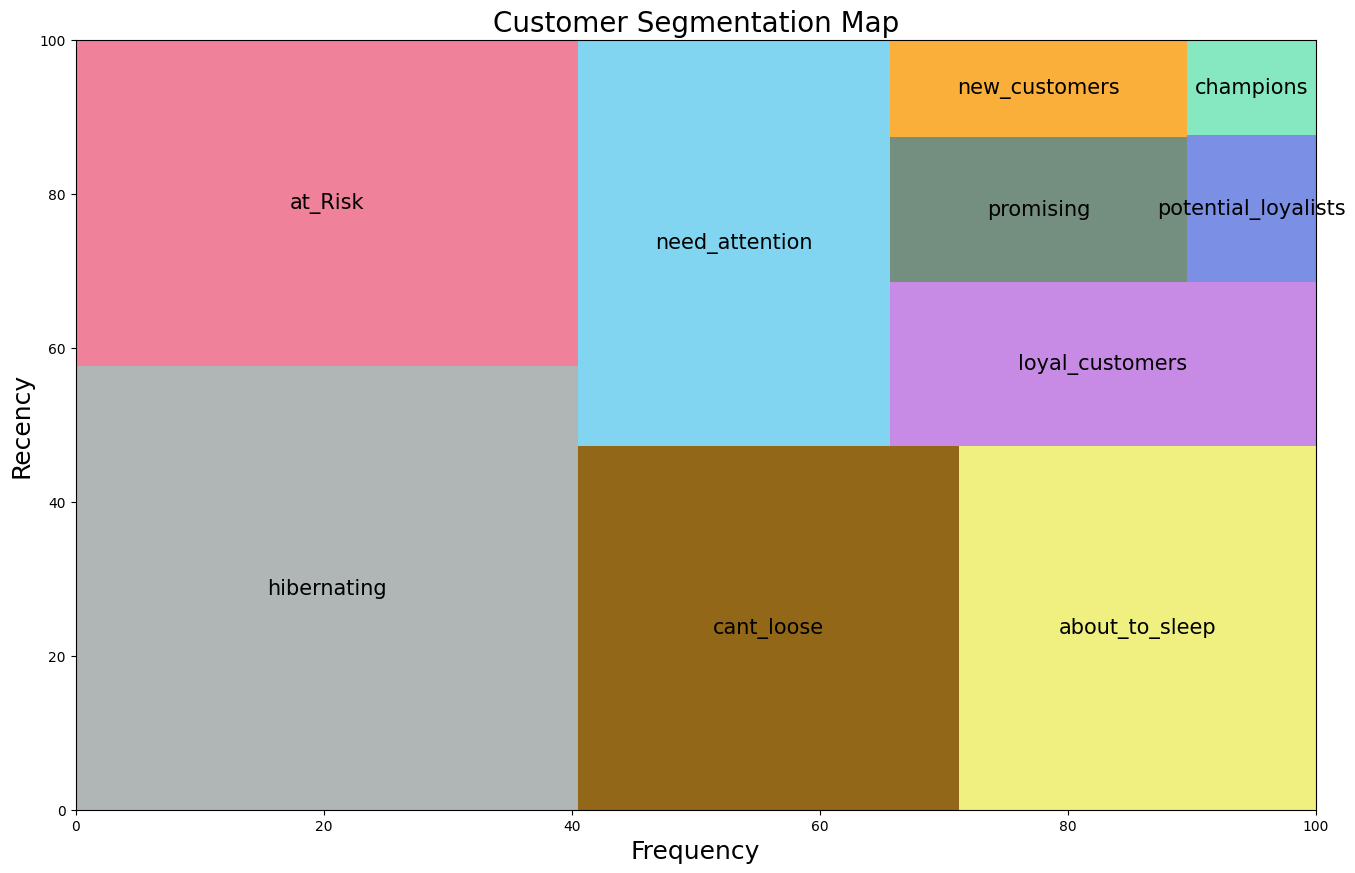

In [107]:
import squarify

segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7652\3547555512.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_7652\3547555512.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\User\AppData\Local\Temp\ipykernel_7652\3547555512.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_7652\3547555512.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\User\AppData\Local\Temp\ipykernel_7652\3547555512.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `leg

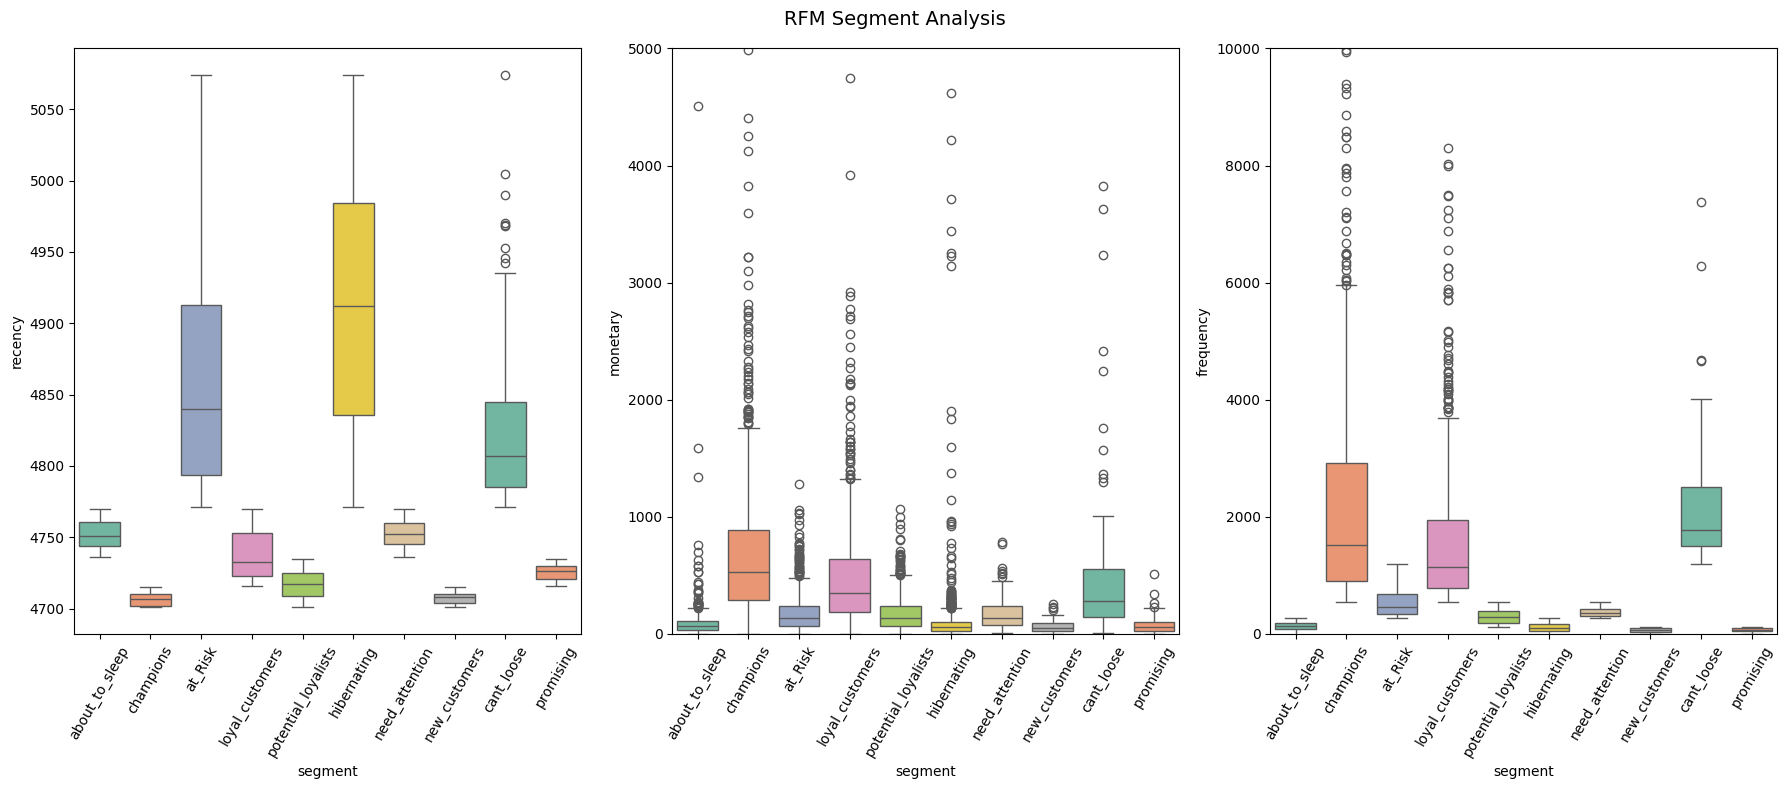

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 5000])
    if idx == 2:
        axes[idx].set_ylim([0, 10000])
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_7652\1358203543.py:12: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\User\git\ml\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



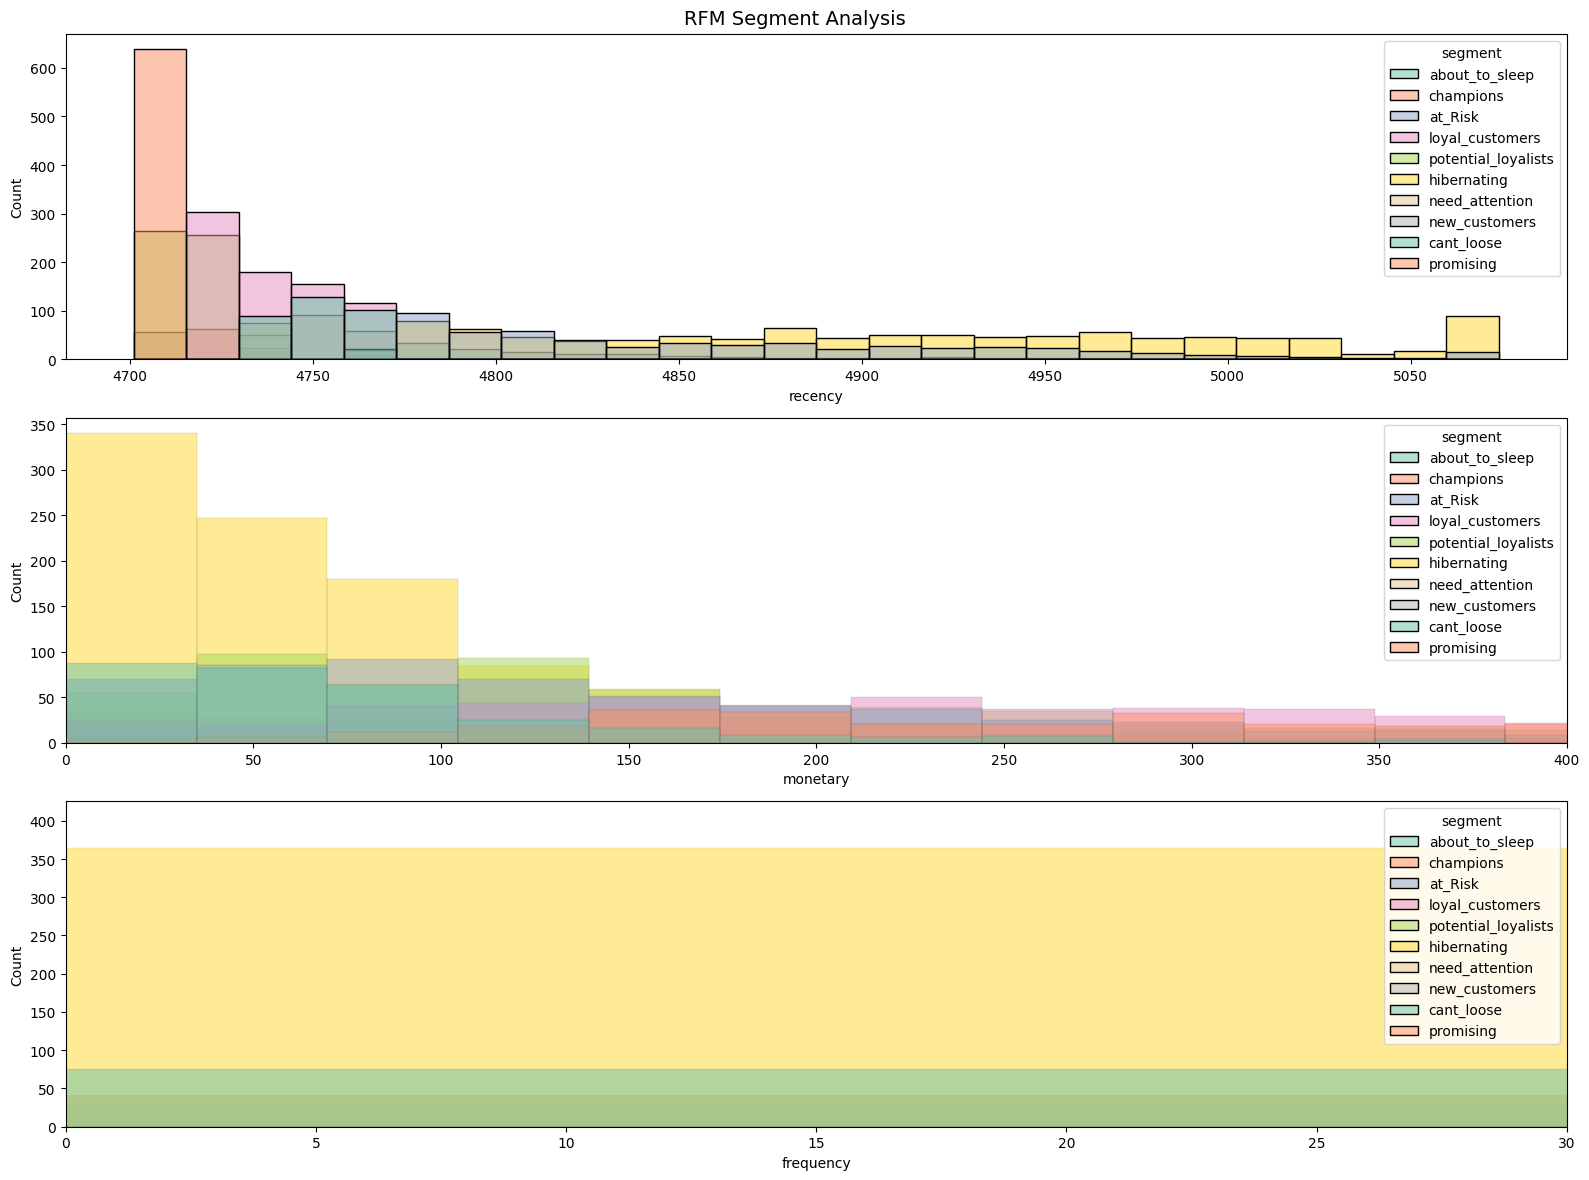

In [109]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

### Cohort Analytsis - Retention of groups of users over time

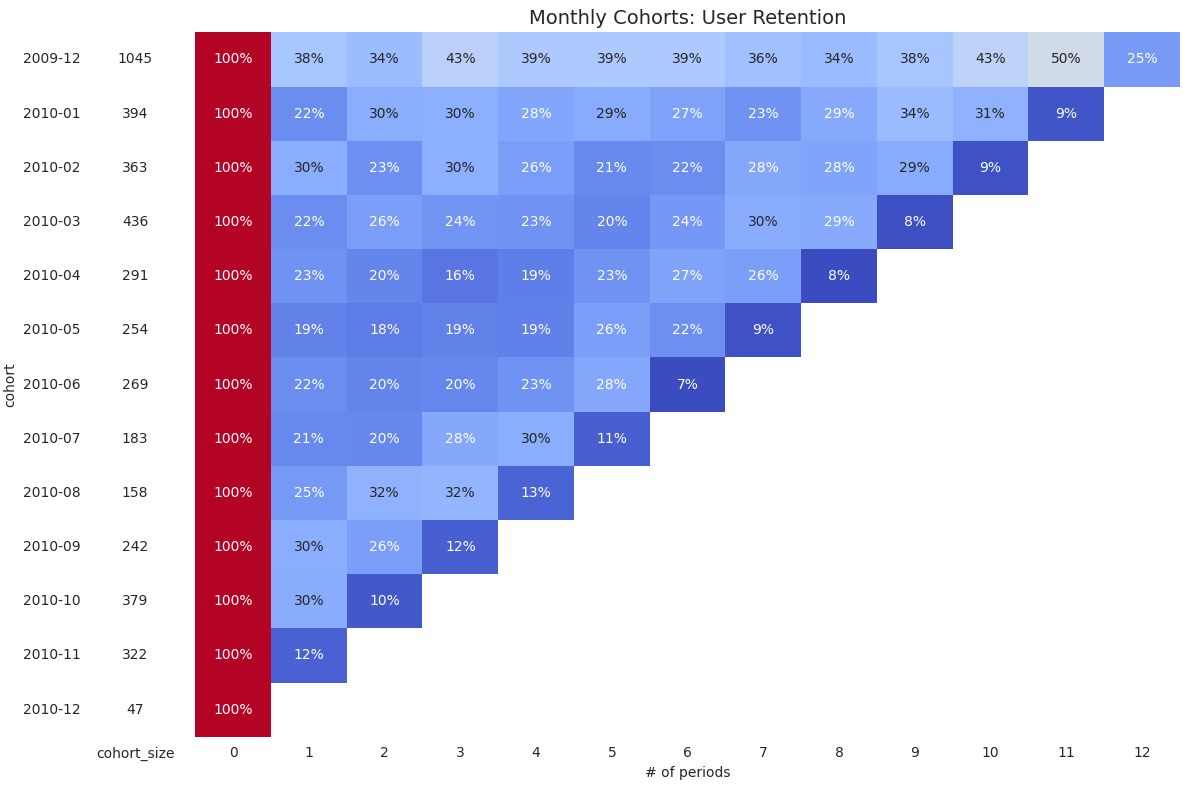

In [116]:
from operator import attrgetter

def CohortAnalysis(dataframe):

    data = dataframe.copy()
    data = data[["Customer_ID", "Description", "InvoiceDate"]].drop_duplicates()
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")
    data["cohort"] = (
        data.groupby("Customer_ID")["InvoiceDate"].transform("min").dt.to_period("M")
    )
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("Customer_ID", "nunique"))
        .reset_index(drop=False)
    )
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )
    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            cbar=False,
            fmt=".0%",
            cmap="coolwarm",
            ax=ax[1],
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),
            annot=True,
            cbar=False,
            fmt="g",
            cmap=white_cmap,
            ax=ax[0],
        )
        fig.tight_layout()
    
CohortAnalysis(df)

In [119]:
cltv_df = df.groupby("Customer_ID").agg(
    {
        "InvoiceDate": [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "Quantity": "sum",
        "Price": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

recency     T  frequency  monetary
Customer_ID                                    
12346.0          294  5061         52    578.36
12347.0           37  4740        828    162.95
12348.0            0  4774        373     14.39
12349.0          327  5071        988    899.49
12351.0            0  4711        261     49.46

In [125]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.sort_values('frequency', ascending=False).head(2)

recency         T  frequency      monetary
Customer_ID                                             
13902.0      0.000833  0.043069     218090  7.551076e-31
14646.0      0.003077  0.043120     168501  2.482129e-28

### Beta Geometric / Negative Binomial Distribution models - modeling the number of transactions made by the customer while he is alive.

In [146]:
from lifetimes import BetaGeoFitter, GammaGammaFitter

BGF = BetaGeoFitter(penalizer_coef=0.001)  # avoid overfitting
# Filter rows where any of the columns contain non-zero values
cltv_df = cltv_df[(cltv_df["frequency"] != 0) & (cltv_df["recency"] != 0) & (cltv_df["T"] != 0)]


BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 2996 subjects, a: 0.24, alpha: 0.00, b: 10.27, r: 0.63>

### Top 10 Expected Number of Transaction (1 Week)

In [141]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

Customer_ID  Expected Number of Transactions
0      17330.0                     8.062669e-02
1      16454.0                     5.425603e-02
2      14495.0                     1.004590e-11
3      13666.0                     6.779793e-13
4      13915.0                     6.920928e-16
5      18037.0                     1.585487e-17
6      14610.0                     1.464326e-21
7      17339.0                     1.096790e-21
8      17599.0                     1.048333e-21
9      18018.0                     6.608417e-24

### Top 10 Expected Number of Transaction (1 Month)

In [147]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

Customer_ID  Expected Number of Transactions
0      17330.0                     2.521256e-01
1      16454.0                     1.681020e-01
2      14495.0                     3.078649e-11
3      13666.0                     2.048774e-12
4      13915.0                     2.086881e-15
5      18037.0                     4.778225e-17
6      14610.0                     4.412654e-21
7      17339.0                     3.302965e-21
8      17599.0                     3.177477e-21
9      18018.0                     1.997048e-23

### Frequency of Repeat Transactions

In [ ]:
from lifetimes.plotting import plot_period_transactions

# Plot a figure with period actual and predicted transactions.
plot_period_transactions(BGF, max_frequency=7)
plt.show()

####   Aggregate the data by the same customer ID, add up the quantities together, create a new column multiplying quantity and price for customer lifetime value 'CLV'

In [71]:
# Group by Customer ID and sum the quantities
grouped = df.groupby('Customer_ID').agg({'Quantity': 'sum', 'Price': 'first', 'Country': 'last', 'Year': 'last', 'Month': 'last', 'Day': 'last', 'Hour': 'last', 'InvoiceDate': 'last'}).reset_index()

# Calculate CLV by multiplying Quantity and Price
grouped['CLV'] = grouped['Quantity'] * grouped['Price']
grouped.head(2)

Customer_ID  Quantity  Price         Country  Year  Month  Day  Hour  \
0      12346.0        52   4.50  United Kingdom  2010     10    4    16   
1      12347.0       828   2.95         Iceland  2010     12    7    14   
2      12348.0       373   0.55         Finland  2010      9   27    14   
3      12349.0       988   3.75           Italy  2010     10   28     8   
4      12351.0       261   0.42     Unspecified  2010     11   29    15   

          InvoiceDate      CLV  
0 2010-10-04 16:33:00   234.00  
1 2010-12-07 14:57:00  2442.60  
2 2010-09-27 14:59:00   205.15  
3 2010-10-28 08:23:00  3705.00  
4 2010-11-29 15:23:00   109.62

In [72]:
timedf = grouped

# Convert the 'InvoiceDate' column to a datetime format
timedf['InvoiceDate'] = pd.to_datetime(timedf['InvoiceDate'])

# Set 'InvoiceDate' as the index
timedf.set_index('InvoiceDate', inplace=True)

timedf.head(2)

Customer_ID  Quantity  Price         Country  Year  \
InvoiceDate                                                               
2010-10-04 16:33:00      12346.0        52   4.50  United Kingdom  2010   
2010-12-07 14:57:00      12347.0       828   2.95         Iceland  2010   

                     Month  Day  Hour     CLV  
InvoiceDate                                    
2010-10-04 16:33:00     10    4    16   234.0  
2010-12-07 14:57:00     12    7    14  2442.6

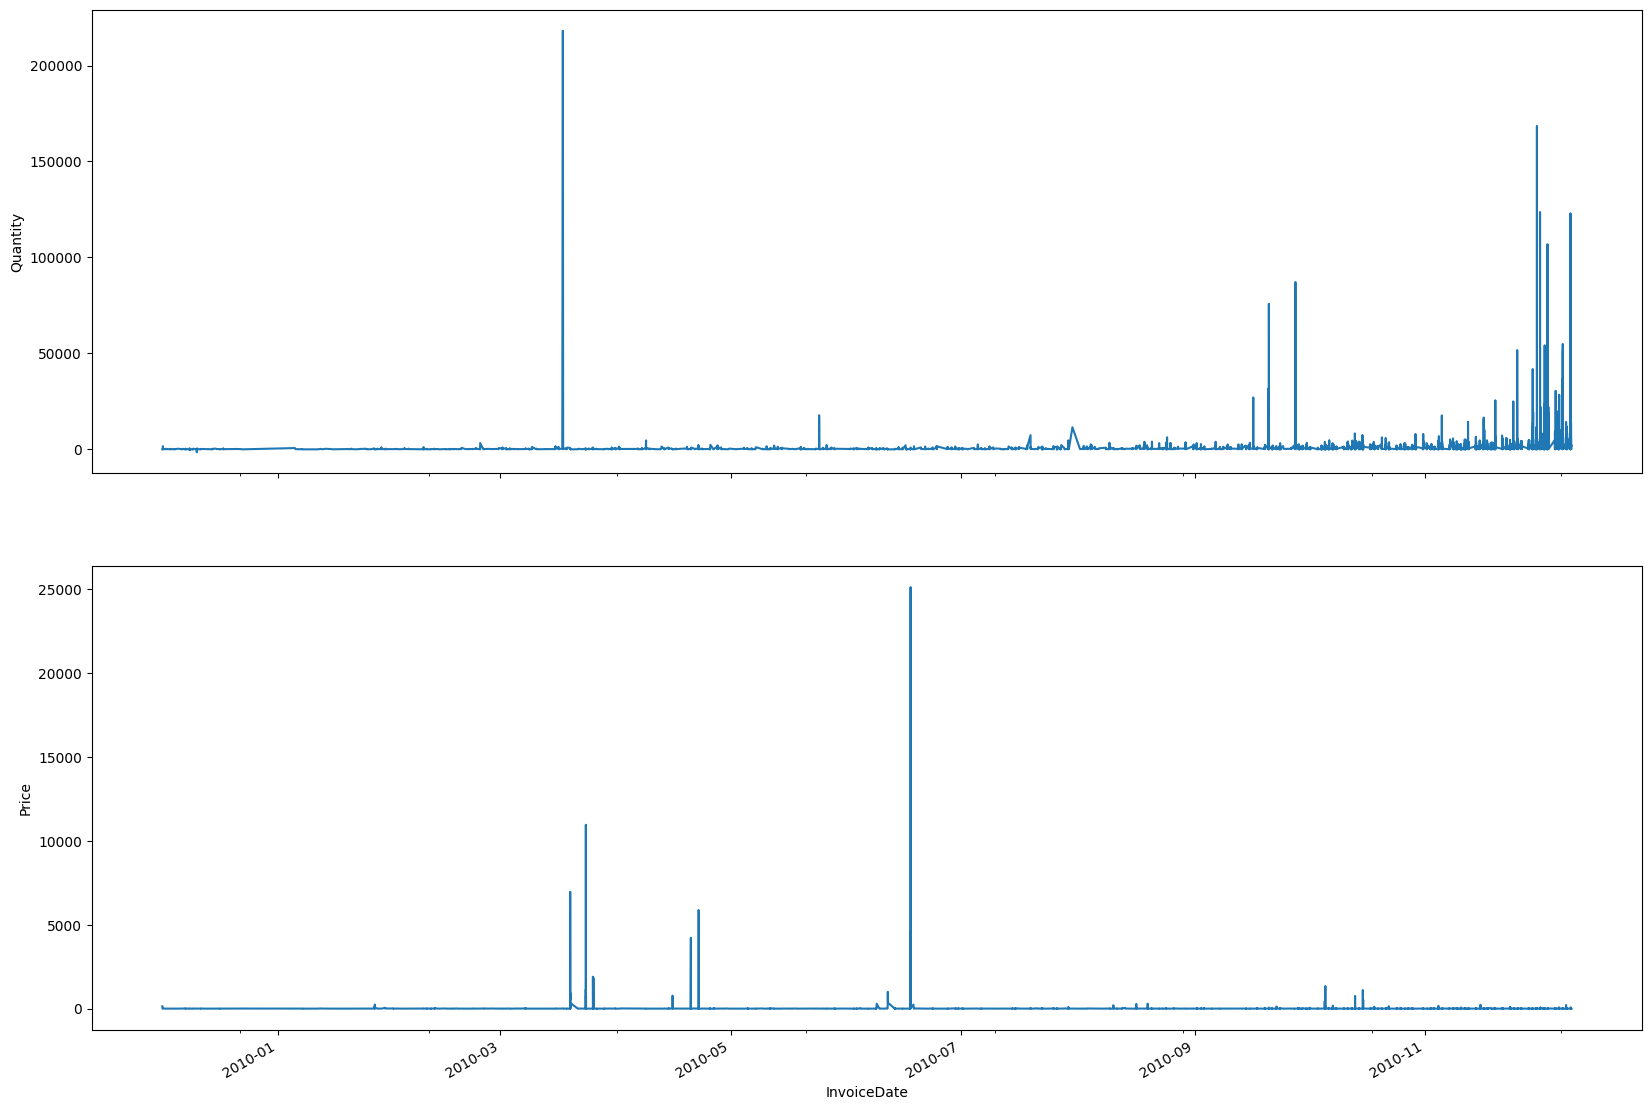

In [73]:
# Plot subplots for different variables
variables = ['Quantity', 'Price']

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(20, 15), sharex=True)

for i, variable in enumerate(variables):
    timedf[variable].plot(ax=axes[i])
    axes[i].set_ylabel(variable)

# Set the common x-axis label
axes[-1].set_xlabel('InvoiceDate')

plt.show()

In [79]:
world_map = grouped[['Customer_ID', 'CLV', 'Country']
              ].groupby(['Customer_ID', 'CLV', 'Country']
                       ).count().reset_index(drop = False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "CLV by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

#### Apply K-Means clustering to your preprocessed data and add cluster labels to the original DataFrame. We also split the data into a train-test set 

C:\Users\User\git\ml\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error for CLV Prediction: 4593392.345670054


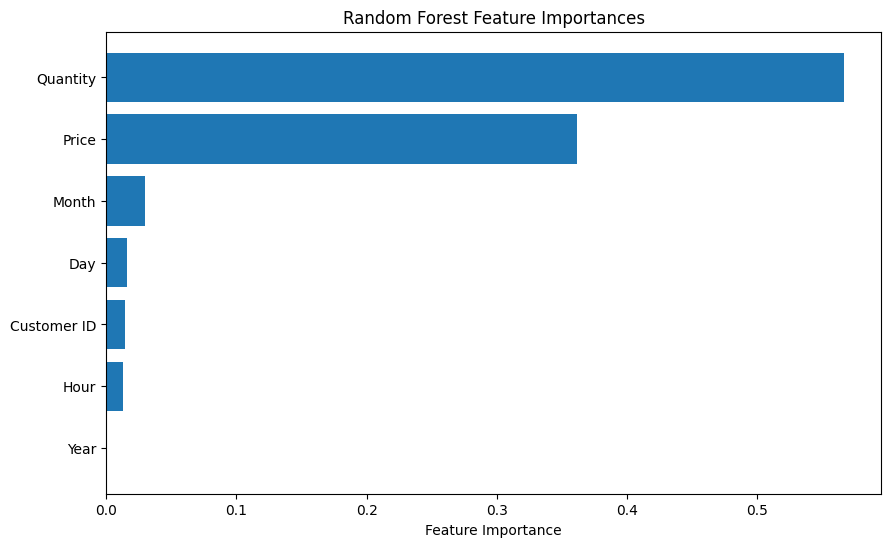

In [59]:

# One-Hot Encoding for 'Country' column
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
country_encoded = encoder.fit_transform(countries)

# Create a DataFrame with one-hot encoded 'Country' values
country_encoded_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['Country']))


# Concatenate the one-hot encoded 'Country' data to your original data
data = pd.concat([data, country_encoded_df], axis=1)

# Define feature columns and target column
feature_cols = ['Customer ID','Quantity','Price','Year','Month','Day','Hour']  # Replace with your feature columns
target_col = 'CLV'  # Replace with your CLV column

# Split data into features and target
X = data[feature_cols]
y = data[target_col]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the Random Forest model
rf_regressor.fit(X_train, y_train)

# Predict CLV on the test set
clv_predictions = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
clv_mse = mean_squared_error(y_test, clv_predictions)
print(f"Mean Squared Error for CLV Prediction: {clv_mse}")

# Get feature importances
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()